## Classification Error Metric Challenges
Name: Robert Fang

Date: Apr 26, 2019

**Settings: Where applicable, use test_size=0.30, random_state=4444. This will permit comparison of results across users.

Challenge 3
Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

Challenge 4
For your movie classifiers, calculate the precision and recall for each class.

Challenge 5
Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

#### Challenge 1 
For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

In [26]:
column_names = ['party', 'handicap', 'water', 'budget', 'physician', 'elsavador', 'religion', 'satellite', 'nicaraguan',
               'missile', 'immigration', 'snyfuels', 'education', 'superfund', 'crime', 'dutyfree', 'export']
house_votes = pd.read_csv("house-votes-84.data", names=column_names)

In [34]:
#Replace y and n to 1 and 0s, and replace ? with the mean of the whole votes
house_votes.replace(to_replace='y', value=1, inplace=True)
house_votes.replace(to_replace='n', value=0, inplace=True)
house_votes.replace(to_replace='democrat', value=1, inplace=True)
house_votes.replace(to_replace='republican', value=0, inplace=True)

In [35]:
house_votes.replace(to_replace='?', value=np.nan, inplace=True)
house_votes.fillna(house_votes.mean(), inplace=True)

In [44]:
house_votes.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,1,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,1,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,1,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [36]:
X = house_votes.drop(['party'],1)
y = house_votes['party']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=44)

In [136]:
#List of the Models
models = [KNeighborsClassifier(n_neighbors=4), 
          LogisticRegression(C=10),
          GaussianNB(),
          SVC(probability=True),
          DecisionTreeClassifier(),
          RandomForestClassifier()]

model_names = ['KNN', 'Logistic', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest']

In [112]:
def model_metrics(models, model_names):
    accuracy =[]
    precision = []
    recall = []
    f1 = []
    metric_df=pd.DataFrame(index=model_names,columns=['Accuracy', 'Precision','Recall','F1_Score'])
    for i, model in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))
    metric_df['Accuracy'] = accuracy
    metric_df['Precision'] = precision
    metric_df['Recall'] = recall
    metric_df['F1_Score'] = f1
    return metric_df

In [113]:
model_metrics(models, model_names)

/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,Accuracy,Precision,Recall,F1_Score
KNN,0.908397,0.949367,0.903614,0.925926
Logistic,0.977099,0.976190,0.987952,0.982036
Naive Bayes,0.969466,0.964706,0.987952,0.976190
SVM,0.969466,0.975904,0.975904,0.975904
Decision Tree,0.969466,0.975904,0.975904,0.975904
Random Forest,0.984733,1.000000,0.975904,0.987805


#### Challenge 2
For each, draw the ROC curve and calculate the AUC.

In [129]:
from sklearn.metrics import roc_auc_score, roc_curve

In [137]:
fpr_l = []
tpr_l = []
thresholds_l = []
auc_l = []
for model in models:
    model.fit(X_train, y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    fpr_l.append(fpr)
    tpr_l.append(tpr)
    auc_l.append(auc)

In [145]:
df_auc = pd.DataFrame(zip(model_names, auc_l))
df_auc.columns=['Model','AUC']
df_auc

,Model,AUC
0,KNN,0.967997
1,Logistic,0.998745
2,Naive Bayes,0.994729
3,SVM,0.998996
4,Decision Tree,0.967118
5,Random Forest,0.997490


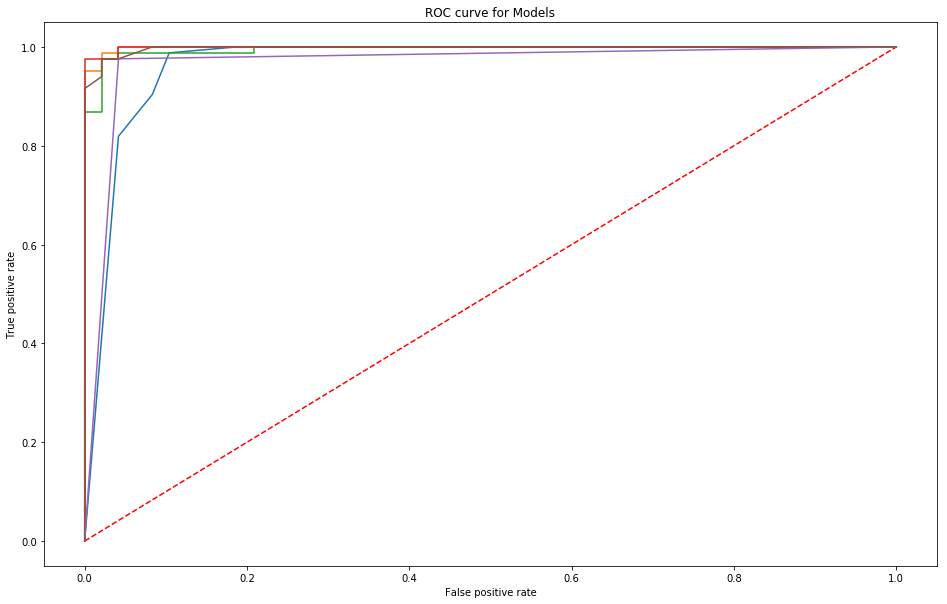

In [156]:
plt.figure(figsize=(16,10))
plt.plot([0,1],[0,1],c='red',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
for i in range(len(fpr_l)):
    plt.plot(fpr_l[i], tpr_l[i])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Models');

#### Challenge 3 
Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [124]:
def model_metrics(models, model_names):
    accuracy =[]
    precision = []
    recall = []
    f1 = []
    metric_df=pd.DataFrame(index=model_names,columns=['Accuracy', 'Precision','Recall','F1_Score'])
    for i, model in enumerate(models):
        accuracy.append(np.mean(cross_val_score(model, X, y, cv=10, scoring='accuracy')))
        precision.append(np.mean(cross_val_score(model, X, y, cv=10, scoring='precision')))
        recall.append(np.mean(cross_val_score(model, X, y, cv=10, scoring='recall')))
        f1.append(np.mean(cross_val_score(model, X, y, cv=10, scoring='f1')))
    metric_df['Accuracy'] = accuracy
    metric_df['Precision'] = precision
    metric_df['Recall'] = recall
    metric_df['F1_Score'] = f1
    return metric_df


In [126]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [127]:
model_metrics(models, model_names)

,Accuracy,Precision,Recall,F1_Score
KNN,0.916938,0.972461,0.891168,0.927736
Logistic,0.962881,0.971011,0.969658,0.969757
Naive Bayes,0.939774,0.951209,0.950997,0.950574
SVM,0.958280,0.977692,0.954558,0.965183
Decision Tree,0.937615,0.959800,0.935755,0.946267
Random Forest,0.963042,0.974582,0.950997,0.955229


#### Challenge 4 
For your movie classifiers, calculate the precision and recall for each class.

In [157]:
def get_movie_data(file_url):
    data = pd.read_csv(file_url, skiprows = 0)
    return data

df_movies = get_movie_data('2013_movies.csv')

In [161]:
df_movies['Budget'].fillna(df_movies['Budget'].mean(), inplace=True)

In [162]:
X = df_movies.drop(['Rating','Title','Director','ReleaseDate'], 1)
y = df_movies['Rating']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=44)

In [201]:
#models_movies = [KNeighborsClassifier(n_neighbors=4), 
#          LogisticRegression(C=10)]

#model_names_movies = ['KNN', 'Logistic']
#model_metrics(models_movies, model_names_movies)

In [181]:
knn_movies = KNeighborsClassifier(n_neighbors=4)
knn_movies.fit(X_train, y_train)
y_pred = knn_movies.predict(X_test)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [182]:
y_train.unique()

array(['R', 'PG-13', 'PG', 'G'], dtype=object)

In [184]:
df_precision = pd.DataFrame(zip(y_train.unique(), precision))
df_precision.columns=['Model','Precision']
df_precision['Recall'] = recall
df_precision

,Model,Precision,Recall
0,R,0.000000,0.000000
1,PG-13,0.000000,0.000000
2,PG,0.642857,0.642857
3,G,0.615385,0.666667


#### Challenge 5 
Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [185]:
df_survival = pd.read_csv("haberman.data", names=['age','year','nodes','status'])

In [190]:
X = df_survival.drop(['status'], 1)
y = df_survival['status']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=44)

In [198]:
lr_survival = LogisticRegression()
lr_survival.fit(X_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, lr_survival.predict_proba(X_test)[:,1], pos_label=2)
auc = roc_auc_score(y_test, lr_survival.predict_proba(X_test)[:,1])
print('AUC:',auc)

AUC: 0.6649184149184149


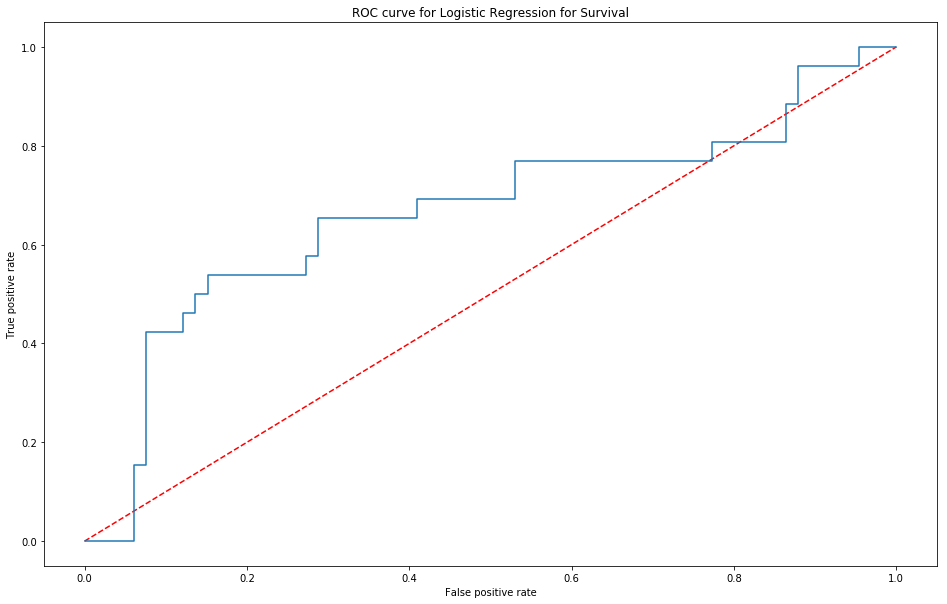

In [200]:
plt.figure(figsize=(16,10))
plt.plot([0,1],[0,1],c='red',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Logistic Regression for Survival');